In [1]:
import fitsio
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
fitsio.read("mdet_data/DES0328-2249_metadetect-v6-all-meas_mdetcat_part0000.fits").dtype.descr

[('slice_id', '>i8'),
 ('mdet_step', '<U7'),
 ('ra', '>f8'),
 ('dec', '>f8'),
 ('ra_noshear', '>f8'),
 ('dec_noshear', '>f8'),
 ('y_noshear', '>f8'),
 ('x_noshear', '>f8'),
 ('y', '>f8'),
 ('x', '>f8'),
 ('slice_y', '>f8'),
 ('slice_x', '>f8'),
 ('slice_y_noshear', '>f8'),
 ('slice_x_noshear', '>f8'),
 ('hpix_16384', '>i8'),
 ('hpix_16384_noshear', '>i8'),
 ('filename', '<U57'),
 ('tilename', '<U12'),
 ('mask_flags', '>i4'),
 ('mask_flags_noshear', '>i4'),
 ('nepoch_g', '>i4'),
 ('nepoch_r', '>i4'),
 ('nepoch_i', '>i4'),
 ('nepoch_z', '>i4'),
 ('nepoch_eff_g', '>i4'),
 ('nepoch_eff_r', '>i4'),
 ('nepoch_eff_i', '>i4'),
 ('nepoch_eff_z', '>i4'),
 ('wmom_flags', '>i4'),
 ('wmom_psf_flags', '>i4'),
 ('wmom_psf_g_1', '>f8'),
 ('wmom_psf_g_2', '>f8'),
 ('wmom_psf_T', '>f8'),
 ('wmom_obj_flags', '>i4'),
 ('wmom_s2n', '>f8'),
 ('wmom_g_1', '>f8'),
 ('wmom_g_2', '>f8'),
 ('wmom_g_cov_1_1', '>f8'),
 ('wmom_g_cov_1_2', '>f8'),
 ('wmom_g_cov_2_2', '>f8'),
 ('wmom_T', '>f8'),
 ('wmom_T_flags', '>i

In [50]:
model = "pgauss_reg0.90"

d = fitsio.read("mdet_data/DES0328-2249_metadetect-v6-all-meas_mdetcat_part0000.fits", columns=[
    "mdet_step", model + "_flags", model + "_T_ratio", model + "_s2n", model + "_T_flags", "shear_bands",
    model + "_T", model + "_T_err",
])

Text(0, 0.5, '$T/T_{PSF}$')

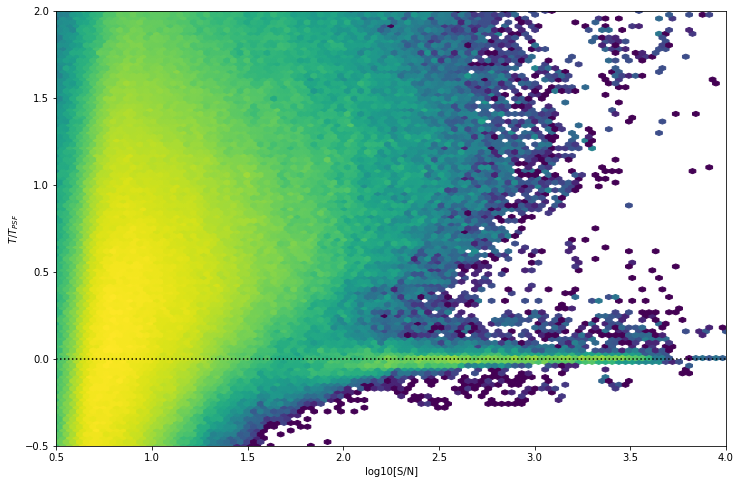

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

msk = d[model + "_T_flags"] == 0
axs.hexbin(np.log10(d[f"{model}_s2n"][msk]), d[f"{model}_T_ratio"][msk], extent=(0.5, 4, -0.5, 2), bins='log')
# axs.plot(np.log10(d[model + "_s2n"][msk]), d[model + "_T_ratio"][msk], '.')
axs.set_ylim(-0.5, 2)
axs.set_xlim(0.5, 4)
if "wmom" in model:
    axs.axhline(1, color='k', linestyle=":")
else:
    axs.axhline(0, color='k', linestyle=":")
axs.set_xlabel("log10[S/N]")
axs.set_ylabel("$T/T_{PSF}$")

0.0023014449616992234 0.05075504881273981


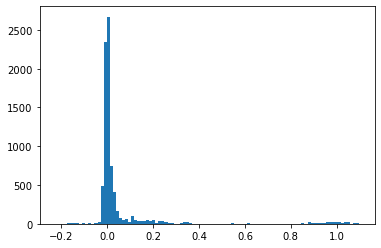

In [52]:
msk = (d[model + "_T_flags"] == 0) & (d[model + "_s2n"] > 1000) & (d[model + "_T_ratio"] < 1.1)
fig, axs = plt.subplots(nrows=1, ncols=1)
axs.hist(d[model + "_T_ratio"][msk], bins=100);
print(np.median(d[model + "_T_ratio"][msk]), np.mean(d[model + "_T_ratio"][msk]))

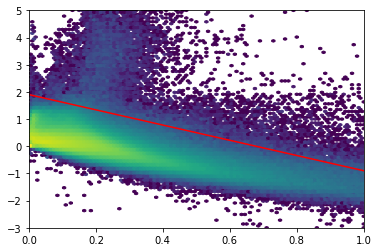

In [53]:
fig, axs = plt.subplots(nrows=1, ncols=1)

msk = (d[model + "_flags"] == 0) & (d[model + "_s2n"] > 10) & (d[model + "_T_ratio"] > 0.5)
msk = np.ones(d.shape[0]).astype(bool)
axs.hexbin(d[f"{model}_T_err"][msk], d[f"{model}_T"][msk], extent=(0, 1, -3, 5), cmap="viridis", bins='log')
axs.set_xlim(0, 1)
axs.set_ylim(-3, 5)
# # axs.plot(np.log10(d[model + "_s2n"][msk]), d[model + "_T_ratio"][msk], '.')
# axs.set_ylim(-0.5, 2)
# axs.set_xlim(0.5, 4)
# if "wmom" in model:
#     axs.axhline(1, color='k', linestyle=":")
# else:
#     axs.axhline(0, color='k', linestyle=":")
# axs.set_xlabel("log10[S/N]")
# axs.set_ylabel("$T/T_{PSF}$")

x = np.linspace(0, 1, 200)
y = 1.9 - 2.8 * x
axs.plot(x, y, '-', color='r')